# PART 02. 데이터 전처리

## 3장. 데이터 결합 및 요약

### 1절. 데이터 결합

#### [Problem]  데이터 프레임을 행 방향으로 연결
- id와 last_name이라는 변수로 이루어진 두 개의 데이터프레임을 생성한 후, 두 데이터프레임을 행 기준으로 결합하여 고객의 아이디와 성을 저장하고 있는 하나의 데이터프레임으로 생성하라.

In [1]:
import pandas as pd

# 행으로 묶을 데이터 생성 : rbind를 사용할 때에는 열의 이름과 개수가 동일해야 함

dic_a = {'id':["c01","c02","c03","c04"],
        'last_name':["Lee", "Kim", "Choi", "Park"]}

dic_b = {'id':["c05", "c06", "c07"],
        'last_name':["Lim" , "Bae", "Kim"]}

customer1 = pd.DataFrame(dic_a)
customer2 = pd.DataFrame(dic_b)

display(customer1, customer2)

,id,last_name
0,c01,Lee
1,c02,Kim
2,c03,Choi
3,c04,Park


,id,last_name
0,c05,Lim
1,c06,Bae
2,c07,Kim


In [2]:
# 두 데이터프레임을 위아래로 연결

id_name = pd.concat( [customer1, customer2],
                    ignore_index=True)    # 결합 후, 기존에 각자 가지고 있던 index 를 무시하고 새로운 index 생성
id_name

,id,last_name
0,c01,Lee
1,c02,Kim
2,c03,Choi
3,c04,Park
4,c05,Lim
5,c06,Bae
6,c07,Kim


#### [Problem]  데이터 프레임을 열 방향으로 연결
- 고객의 나이(age)와 수입(income)을 담고 있는 데이터(age_income)를 새로 생성하고, rbind 함수 예제에서 생성했던 id_name 데이터와 열을 기준으로 결합하여 customer 데이터를 생성하라.

In [3]:
import pandas as pd

# 열로 묶을 데이터 생성 : cbind를 사용할 때에는 행의 개수가 동일해야 함
# age변수와 income변수로 구성된 데이터프레임 생성

dic_c = {'age' : [20, 25, 37, 40, 32, 45, 37],
         'income' : [2500, 6400, 0, 7000, 3400, 3800, 5010]}

age_income = pd.DataFrame(dic_c)
age_income

,age,income
0,20,2500
1,25,6400
2,37,0
3,40,7000
4,32,3400
5,45,3800
6,37,5010


In [4]:
# 두 데이터프레임을 좌우로 연결

pd.concat( [id_name, age_income], axis=1 )    # 열 방향 연결 옵션 : axis = 1

,id,last_name,age,income
0,c01,Lee,20,2500
1,c02,Kim,25,6400
2,c03,Choi,37,0
3,c04,Park,40,7000
4,c05,Lim,32,3400
5,c06,Bae,45,3800
6,c07,Kim,37,5010


#### [Problem]  merge
- 고객의 아이디(id), 이름(name)으로 이루어진 데이터프레임(id_name)과 고객의 아이디(id), 번호(number)로 이루어진 데이터프레임(id_number)을 생성한 뒤, 다양한 방법을 사용하여 두 데이터를 병합하라.

In [5]:
import pandas as pd

# 병합에 사용할 데이터프레임 생성
id_name = pd.DataFrame( {'id' : ["c01","c02","c03","c04","c05", "c06", "c07"],
                       'last_name' : ["Lee", "Kim", "Choi", "Park", "Lim" , "Bae", "Kim"]} )

id_number = pd.DataFrame( {'id' : ["c03", "c04", "c05", "c06", "c07", "c08", "c09"],
                           'number' : [3, 1, 0, 7, 3, 4, 1]} )

# id_name, id_number 데이터프레임 확인
display(id_name, id_number)

,id,last_name
0,c01,Lee
1,c02,Kim
2,c03,Choi
3,c04,Park
4,c05,Lim
5,c06,Bae
6,c07,Kim


,id,number
0,c03,3
1,c04,1
2,c05,0
3,c06,7
4,c07,3
5,c08,4
6,c09,1


In [6]:
# Q1) id 칼럼을 기준으로 두 테이블이 모두 공통된 값을 가지고 있는 경우에만 두 데이터(id_name, id_number)를 병합.
# (데이터베이스의 Inner Join에 해당)

pd.merge(id_name, id_number)

,id,last_name,number
0,c03,Choi,3
1,c04,Park,1
2,c05,Lim,0
3,c06,Bae,7
4,c07,Kim,3


In [7]:
# Q2) 공통된 값이 없는 경우에도 데이터가 출력되도록 id 칼럼을 기준으로 두 데이터(id_name, id_number)의 모든 행을 병합.
# (데이터베이스의 Outer Join에 해당)
# 기준칼럼에 공통된 값이 없는 경우, 다른 변수 값 자리에는 NA가 채워짐

pd.merge(id_name, id_number,
        how = 'outer',
        on = 'id')

,id,last_name,number
0,c01,Lee,NaN
1,c02,Kim,NaN
2,c03,Choi,3.0
3,c04,Park,1.0
4,c05,Lim,0.0
5,c06,Bae,7.0
6,c07,Kim,3.0
7,c08,NaN,4.0
8,c09,NaN,1.0


In [8]:
# Q3) id 칼럼을 기준으로 두 데이터(id_name, id_number)를 병합하되 기준칼럼에 공통 값이 없는 경우에는 id_name 데이터를 기준으로 병합.
# (데이터베이스의 Left Outer Join에 해당)

pd.merge(id_name, id_number,
        how = 'left')

,id,last_name,number
0,c01,Lee,NaN
1,c02,Kim,NaN
2,c03,Choi,3.0
3,c04,Park,1.0
4,c05,Lim,0.0
5,c06,Bae,7.0
6,c07,Kim,3.0


In [9]:
# Q4) id 칼럼을 기준으로 두 데이터(id_name, id_number)를 병합하되 기준칼럼에 공통 값이 없는 경우에는 id_number 데이터를 기준으로 병합. 
# (데이터베이스의 Right Outer Join에 해당)

pd.merge(id_name, id_number,
        how = 'right')

,id,last_name,number
0,c03,Choi,3
1,c04,Park,1
2,c05,Lim,0
3,c06,Bae,7
4,c07,Kim,3
5,c08,NaN,4
6,c09,NaN,1


### 2절. 데이터 요약

#### [Problem]  aggregate
- iris 데이터에서 종별 Sepal.Width의 평균을 구하라
- iris 데이터에서 종별 Sepal.Width, Petal.Width 의 평균을 한 번에 구하라

In [10]:
import pandas as pd
import seaborn as sb

# iris 데이터 프레임 생성
df_iris = sb.load_dataset('iris')

In [11]:
# 데이터 프레임 파악
display(df_iris.columns)
print()
display(df_iris.head())
print()
display(df_iris.describe())
print()
display(df_iris.info())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

In [12]:
df_sl = df_iris[ ['species', 'sepal_length'] ]
grouped = df_sl.groupby('species')

grouped.mean()

,sepal_length
species,
setosa,5.006
versicolor,5.936
virginica,6.588


In [13]:
df_sl_pw = df_iris[ ['species', 'sepal_length', 'petal_width'] ]
grouped = df_sl_pw.groupby('species')

grouped.mean()

,sepal_length,petal_width
species,,
setosa,5.006,0.246
versicolor,5.936,1.326
virginica,6.588,2.026


#### [Problem]  도수분포
- 내장데이터 Titanic은 타이타닉호 탑승자들의 특성에 따른 생존여부를 기록해놓은 데이터이다.
- Q1) Titanic이 데이터에서 좌석등급을 의미하는 Class 변수에 대해서 도수분포표를 생성하라.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb

df_titanic = sb.load_dataset('titanic')

In [4]:
display(df_titanic, df_titanic.columns, df_titanic.describe(), df_titanic.info )

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [5]:
df_titanic['class']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

(array(['First', 'Second', 'Third'], dtype=object),
 array([216, 184, 491], dtype=int64))

Third     491
First     216
Second    184
Name: class, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

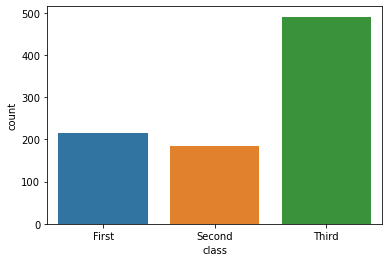

In [6]:
# numpy 를 이용한 도수분포 구하기
display( np.unique(df_titanic['class'], return_counts=True) )
print()

# pandas 를 이용한 도수분포 구하기
display( pd.Series(df_titanic['class']).value_counts() )
print()

# seaborn 을 이용한 도수분포 구하기
display( sb.countplot(df_titanic['class']) )

#### [Problem]  변수에 따른 도수분포
- 내장데이터 Titanic에서 Survived 변수는 승객의 생존여부를 의미한다.
- Q2) 좌석등급과 생존여부의 관계를 살펴보기 위해 Class 변수에 따른 Survived 변수의 도수를 표 형태로 표현하라.

In [7]:
grouped_class = df_titanic.groupby(['class','survived'])

grouped_class['survived'].count()

class   survived
First   0            80
        1           136
Second  0            97
        1            87
Third   0           372
        1           119
Name: survived, dtype: int64

#### [Problem]  상대도수
- Titanic 데이터에서 Age 변수는 해당 승객이 어른인지 아이인지의 여부를 나타낸다. 
- Q3) Age 변수에 따른 생존여부의 관계를 전체에 대한 비율, 행별 비율, 열별 비율로 살펴보자.

In [8]:
def adult(x):
    if x >=19:
        return 'Adult'
    else:
        return 'Child'

df_titanic['adult'] = df_titanic['age'].apply(lambda x : adult(x))
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Adult
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Child
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult


In [12]:
grouped_class = df_titanic.groupby(['adult','survived'])

grouped_class['survived'].value_counts(normalize=True)

adult  survived  survived
Adult  0         0           1.0
       1         1           1.0
Child  0         0           1.0
       1         1           1.0
Name: survived, dtype: float64

#### [Problem] subset
- 내장데이터 iris에서 종(Species)이 setosa이면서, Sepal.Length의 값이 5.5초과인 데이터들의 Species와 Sepal.Length 변수값만 조회하라. 

In [21]:
import numpy as np
import pandas as pd
import seaborn as sb

df_iris = sb.load_dataset('iris')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
filted_iris = df_iris.loc[ (df_iris['species'] == 'setosa')
                          & (df_iris['sepal_length'] > 5.5) ]

filted_iris[['species', 'sepal_length']]

,species,sepal_length
14,setosa,5.8
15,setosa,5.7
18,setosa,5.7


### 3절. apply 계열 함수

#### [Problem]  행렬의 행/열 별 연산
- 행 3열로 이루어진 행렬을 만든 후에 각 행별로 max 값을 구하라.
- iris 데이터의 1~4열에 대해서 평균을 구하라.

In [23]:
import numpy as np

A = np.array( [ [1, 5, 9],
                [2, 6, 10],
                [3, 7, 11],
                [4, 8, 12] ] )

np.max(A, axis = 1)

array([ 9, 10, 11, 12])

In [24]:
import seaborn as sb

df_iris = sb.load_dataset('iris')

np.mean( df_iris.iloc[:, 0:3], axis = 0 )

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
dtype: float64

#### [Problem]  lapply
- 숫자가 저장된 벡터의 값을 제곱한 뒤 리스트 형태로 반환하라.

In [25]:
import numpy as np

# 1,2,3의 숫자로 구성된 데이터 생성
data = [1, 2, 3]

# 데이터를 벡터(1차원 배열)로 변환
vec_1 = np.array(data)
display(vec_1)
print()

# 생성한 벡터를 제곱하여 새로운 백터 생성
vec_2 = vec_1**2
display(vec_2)
print()

# 계산된 벡터(1차원 배열)를 리스트로 변환
list_1 = vec_2.tolist()
display( list_1, type(list_1) )

array([1, 2, 3])

array([1, 4, 9], dtype=int32)

[1, 4, 9]

list

#### [Problem]  sapply
- iris 데이터에서 각 컬럼별 데이터 타입, 데이터 구조 확인

In [26]:
import seaborn as sb

df_iris = sb.load_dataset('iris')

display( df_iris.info(), df_iris.describe() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### [Problem]  vapply
- Q) 1~100까지의 숫자가 저장된 리스트에 fivenum함수를 적용한 후, 각 값에 이름을 부여하여 리스트 형태로 출력하라.
- 

In [27]:
a = list(range(1,101))

import pandas as pd
b = pd.DataFrame(a)
b.describe()

,0
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


In [28]:
pd.DataFrame(b.describe(),
             index = ['Count', 'Average', 'Std', 'Min', 'Q1', 'Median', 'Q3', 'Max'])

,0
Count,NaN
Average,NaN
Std,NaN
Min,NaN
Q1,NaN
Median,NaN
Q3,NaN
Max,NaN


#### [Problem]  mapply
- Q) 1을 4번, 2를 3번, 3을 2번, 4를 1번 반복하는 4개의 수열을 출력하는 코드를 작성하라.
- 이 때 rep 함수를 이용할 때와 mapply 함수를 이용 할 때를 비교해보자.

In [29]:
import numpy as np

a = np.repeat(1, 4)
b = np.repeat(2, 3)
c = np.repeat(3, 2)
d = np.repeat(4, 1)

display(a,b,c,d)

array([1, 1, 1, 1])

array([2, 2, 2])

array([3, 3])

array([4])

In [30]:
list(range(4,0,-1))

[4, 3, 2, 1]

In [31]:
def rep(x, y):
    return np.repeat(x, y)

a = list(range(1,5))
b = list(range(4,0,-1))

c = map( rep, a, b )
c

#### [Problem]  tapply
- R의 googleVis 패키지에 있는 Fruits 데이터에서 과일종류(Fruit)별 판매량(Sales)의 평균을 구하라.

In [32]:
import pandas as pd

df_fruits = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/fruits.csv')
df_fruits

,Fruit,Year,Location,Sales,Expenses,Profit,Date
0,Apples,2008,West,98,78,20,2008-12-31
1,Apples,2009,West,111,79,32,2009-12-31
2,Apples,2010,West,89,76,13,2010-12-31
3,Oranges,2008,East,96,81,15,2008-12-31
4,Bananas,2008,East,85,76,9,2008-12-31
5,Oranges,2009,East,93,80,13,2009-12-31
6,Bananas,2009,East,94,78,16,2009-12-31
7,Oranges,2010,East,98,91,7,2010-12-31
8,Bananas,2010,East,81,71,10,2010-12-31


In [33]:
# 과일종류(Fruit)별 판매량(Sales)의 평균

df_fruits.groupby('Fruit').mean()['Sales']

Fruit
Apples     99.333333
Bananas    86.666667
Oranges    95.666667
Name: Sales, dtype: float64

#### [Problem]  INDEX인자에 비교구문을 사용하여 그룹을 지정
- Location이 West인 것과 아닌 것으로 그룹을 지정하여 Profit의 평균을 구하라

In [34]:
# Location 값이 'West' 인지 아닌지에 따라 True/False 를 반환하는 조건식을 goupby 조건에 넣는다.

df_fruits.groupby(df_fruits['Location'] == 'West').mean()['Profit']

Location
False    11.666667
True     21.666667
Name: Profit, dtype: float64